# 1. Create dataset for supermarket perform data clearning and association mining using fpgrowth in rapidminer

## Create Dataset

In [37]:
import pandas as pd
import random
import string
data = {
        'Ragi': list(random.randint(0,1) for i in range(1,50)),
        'Rice': list(random.randint(0,1) for i in range(1,50)),
        'Potato': list(random.randint(0,1) for i in range(1,50)),
        'Tomato': list(random.randint(0,1) for i in range(1,50)),
        'Brinjal':list(random.randint(0,1) for i in range(1,50)),
        }

df = pd.DataFrame (data, columns = ['Ragi','Rice','Potato','Tomato','Brinjal'],index=list(range(1,50)))
df.index.name = "tid"

df.to_csv("marketbasket.csv")
df = pd.read_csv("marketbasket.csv")
df.head()

,tid,Ragi,Rice,Potato,Tomato,Brinjal
0,1,1,1,0,0,1
1,2,0,1,0,1,0
2,3,1,1,0,0,0
3,4,0,0,0,0,0
4,5,1,0,0,0,0


# 1.b For a set of 20 points write a R or python program to generate 3 clusters using K means

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

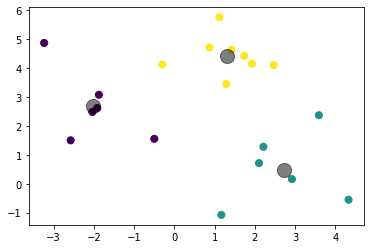

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y_test = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


# 2.a Create a bank dataset 


In [39]:
import pandas as pd
import random
import string
data = {
        'Name': list(''.join(random.choices(string.ascii_uppercase, k = 5)) for i in range(1,50)),
        'Gender': list(" ".join(random.choices(['M','F',''])) for i in range(1,50)),
        'State': list(''.join(random.choices(['karnataka','kerala','tamilnadu','andhra',''])) for i in range(1,50)),
        'age': list(random.randint(12,60) for i in range(1,50)),
        'amount': list(random.randint(5000,150000) for i in range(1,50)),
        'job':list("".join(random.choices(['Teacher','Doctor','Farmer'])) for i in range(1,50)),
        'fraud':list("".join(random.choices(["yes","no"])) for i in range(1,50))
        }

df = pd.DataFrame (data, columns = ['Name','Gender','State','age','amount','job','fraud'],index=list(range(1,50)))
df.index.name = "id"

df.to_csv("output.csv")
df = pd.read_csv("output.csv")
df.head()

,id,Name,Gender,State,age,amount,job,fraud
0,1,EOUDW,M,tamilnadu,19,139125,Farmer,yes
1,2,OLNNE,NaN,tamilnadu,43,53018,Teacher,no
2,3,UQBTT,NaN,andhra,56,52250,Doctor,yes
3,4,GRITL,M,tamilnadu,18,31906,Doctor,no
4,5,ANBCE,NaN,tamilnadu,25,107952,Farmer,no


# 3.b

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


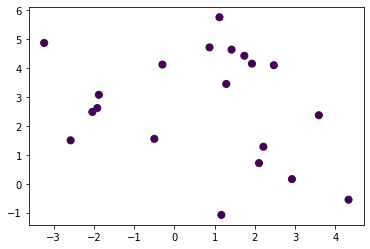

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y_test = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=0)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
print(clustering.labels_)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=50)

